In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Let's explore the data

In [2]:
data = pd.read_csv('data/measurements.csv')

In [11]:
# Function to apply common snake_case format to all column headers
def std_data(x, y='_'):
    x.columns = [e.lower().replace(' ','_') for e in x]
    return x

data = std_data(data)

In [28]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [22]:
data.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


**NOTE: I see that the Excel and .csv have the same data, I'll continue with the .csv in this case**

In [5]:
# .info for a holistic overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


**distance, consume and temp_inside should be float dtypes, not object. Changing this below:**

In [33]:
# first changing , to . for proper decimal format
data['distance'] = data['distance'].str.replace(',','.')
data['consume'] = data['consume'].str.replace(',','.')
data['temp_inside'] = data['temp_inside'].str.replace(',','.')

In [38]:
data[["distance","consume","temp_inside"]] = data[["distance","consume","temp_inside"]].apply(pd.to_numeric)
print(data.dtypes)

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters     object
refill_gas        object
dtype: object


In [35]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [8]:
# Checking columns with nans
def nan_check(df):
    nans = pd.DataFrame(df.isna().sum()).reset_index()
    nans.columns = ['count', 'val']
    display(nans[nans['val']>0])
    return None

nan_check(data)

,count,val
3,temp_inside,12
5,specials,295
10,refill liters,375
11,refill gas,375


**Lets deal with the 12 missing values in temp inside**

In [39]:
# checking value counts
data.temp_inside.value_counts(dropna=False)

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
NaN      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [42]:
# I think it best and safe to change the missing values to the mmedian
data.temp_inside.median()

22.0

In [43]:
data.temp_inside = data.temp_inside.fillna(22.0) # median

In [44]:
data.temp_inside.value_counts(dropna=False)

21.5    133
22.0    114
22.5     59
20.0     25
21.0     13
23.0     13
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

**Checking the specials column**

In [10]:
data.specials.value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [ ]:
data.loc[data.specials == 'snow']

In [ ]:
data.loc[data.specials == 'AC rain']

In [20]:
data.loc[data.specials == 'sun ac']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
299,"18,7","4,2",65,25,18,sun ac,SP98,1,0,1,NaN,NaN
301,19,5,35,22,15,sun ac,SP98,1,0,1,NaN,NaN
366,"16,6","4,1",48,"25,5",30,sun ac,SP98,1,0,1,NaN,NaN


**NOTE: I decided to drop the specials column. The data herein is incomplete and the actual values, where available, are repeated in the ac, rain and sun columns. I might rename the column rain to slippery_conditions as it also is set to 1 when specials talks of snow condidtions.**

In [45]:
data = data.drop(columns='specials', axis=1)
data.shape

(388, 11)

**Checking the columns refill_litres and refill_gas**

In [49]:
# double checking value counts for gas type to see if the data matches up with refill gas
data.gas_type.value_counts(dropna=False)

SP98    228
E10     160
Name: gas_type, dtype: int64

In [47]:
data.refill_liters.value_counts(dropna=False)

NaN     375
45        2
37,7      2
39        2
37,6      1
38        1
38,3      1
10        1
41        1
37        1
37,2      1
Name: refill_liters, dtype: int64

In [48]:
data.refill_gas.value_counts(dropna=False)

NaN     375
SP98      8
E10       5
Name: refill_gas, dtype: int64

NOTE: I understand that this data comes from one car, not multiple vehicles. Given this fact, not on every trip did the driver refill gas and therefore the refill litres and gas columns are empty for most cells. We could fill the NaN values with "0" for refill_liters and "none" for refill_gas, but doing so would likely imbalance the overall data immensly. I decided to drop these columns and proceed without them for the time being. We can always come back again to do more with this data at a later stage

In [52]:
data = data.drop(columns=["refill_liters","refill_gas"], axis=1)
data.shape

(388, 9)

In [54]:
nan_check(data)

,count,val


**data cleanup completed**

### Visualisation

In [56]:
data.head(1)

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0


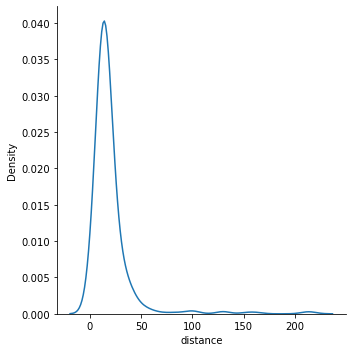

In [57]:
data['distance'] = data["distance"].fillna(np.mean(data['distance']))
sns.displot(data['distance'], kind = 'kde')
plt.show()

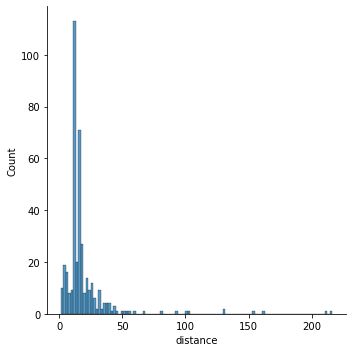

In [60]:
sns.displot(data['distance']) 
plt.show()

most trips are taken in a range of anywhere between 0 - 50 (I assume km is the measure, not miles) and more specifically in a range between 10 - 20 km. There are some outliers with trips that are much longer

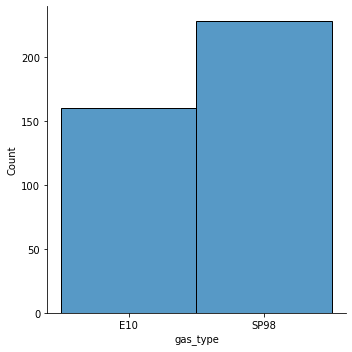

In [58]:
sns.displot(data['gas_type'])
plt.show()

The driver used SP98 more frequently than E10 - we can onehot encode this data for modeling

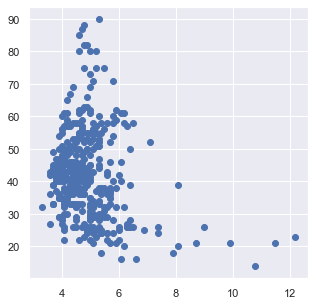

In [62]:
plt.plot('consume', 'speed', data=data,  linestyle='none', marker='o')
sns.set(rc={'figure.figsize':(5,5)})
 
# Show the graph
plt.show()

Not entirely conclusive that speed plays a large influence on overall consumption

### Modeling